In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv("fiat500.csv")
print(df.to_string())

        ID   model  engine_power  age_in_days      km  previous_owners        lat        lon  price
0        1  lounge            51          882   25000                1  44.907242   8.611560   8900
1        2     pop            51         1186   32500                1  45.666359  12.241890   8800
2        3   sport            74         4658  142228                1  45.503300  11.417840   4200
3        4  lounge            51         2739  160000                1  40.633171  17.634609   6000
4        5     pop            73         3074  106880                1  41.903221  12.495650   5700
5        6     pop            74         3623   70225                1  45.000702   7.682270   7900
6        7  lounge            51          731   11600                1  44.907242   8.611560  10750
7        8  lounge            51         1521   49076                1  41.903221  12.495650   9190
8        9   sport            73         4049   76000                1  45.548000  11.549470   5600


In [33]:
print(df.shape)


(1538, 9)


In [34]:
print(df.isna().sum())

ID                 0
model              0
engine_power       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64


In [35]:
fiatdata=df.drop(columns=['ID','model','lat','lon'])
print(fiatdata.corr().to_string())

                 engine_power  age_in_days        km  previous_owners     price
engine_power         1.000000     0.319190  0.285495        -0.005030 -0.277235
age_in_days          0.319190     1.000000  0.833890         0.075775 -0.893328
km                   0.285495     0.833890  1.000000         0.097539 -0.859373
previous_owners     -0.005030     0.075775  0.097539         1.000000 -0.076274
price               -0.277235    -0.893328 -0.859373        -0.076274  1.000000


In [36]:
df['model'].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [37]:
df.value_counts('model')

model
lounge    1094
pop        358
sport       86
Name: count, dtype: int64

In [38]:
dfsport= df.loc[df['model']=='sport']
dflounge=df.loc[df['model']=='lounge']
dfpop=df.loc[df['model']=='pop']
print(dfsport.shape)
print(dflounge.shape)
print(dfpop.shape)

(86, 9)
(1094, 9)
(358, 9)


In [39]:
print(df['km'].max())
print(df['km'].min())
print(df['km'].mean())

235000
1232
53396.01170351105


In [40]:
print(dfsport.describe().to_string())

                ID  engine_power  age_in_days             km  previous_owners        lat        lon         price
count    86.000000     86.000000    86.000000      86.000000        86.000000  86.000000  86.000000     86.000000
mean    724.406977     55.465116  3310.372093  103382.802326         1.267442  43.799563  11.436682   6275.406977
std     489.008610      8.210034  1165.134994   43041.072473         0.602435   2.126544   2.650824   1916.322860
min       3.000000     51.000000   517.000000    6200.000000         1.000000  38.112740   7.330990   3800.000000
25%     227.750000     51.000000  3020.750000   72425.000000         1.000000  41.757082   9.205970   4892.500000
50%     765.500000     51.000000  3684.000000  102400.000000         1.000000  45.013901  11.330880   5800.000000
75%    1082.000000     56.250000  4139.000000  129973.000000         1.000000  45.526340  13.233512   6900.000000
max    1534.000000     74.000000  4658.000000  190000.000000         4.000000  46.792019

In [17]:
x=dfsport.drop(columns=(['ID','model','engine_power','lat','lon','price']))
y=dfsport['price']
print(x.to_string())
print(y.to_string())

      age_in_days      km  previous_owners
2            4658  142228                1
8            4049   76000                1
9            3653   89000                1
27           3531  100000                1
33           3927  140000                2
38            790   43100                1
40           4139  119000                1
48           3684  160000                1
49           4596  107000                1
51            790   35000                1
53           3288   71900                1
67           4261  188000                1
77           2739   77149                3
81           4292  145000                3
95           4292  165600                1
97           2009   86000                2
114          4018  102000                1
132          3988  175000                1
148          4383   74000                1
172          4077  124000                1
214          3592   99180                1
225          3896  120000                1
232        

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [43]:
ans = model.predict([[2190,70000,1],[2190,70000,2]])
print(ans)

[8017.82458566 7910.56801183]


C:\Users\santh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
x1=dflounge.drop(columns=(['ID','model','engine_power','lat','lon','price']))
y1=dflounge['price']
print(x1.to_string())
print(y1.to_string())

      age_in_days      km  previous_owners
0             882   25000                1
3            2739  160000                1
6             731   11600                1
7            1521   49076                1
11            366   17500                1
12            456   18450                1
14           1035   40500                1
15           1096   28200                1
16           4200  110000                1
18           2861   31000                1
19            425   20030                1
20            397   19037                1
21           1886  110000                1
22           1035    8000                1
23            790   27595                1
24           1583   14900                1
25            366    9218                1
28            762   28900                1
29            670    4000                1
30           2769   59216                1
31           4169   99477                2
32            821   21730                2
34         

In [33]:
model=LinearRegression()
model.fit(x1,y1)

LinearRegression()

In [35]:
age=int(input())
km=int(input())
pre_ow=int(input())
ans1 = model.predict([[age,km,pre_ow]])
print(ans1)

 366
 17500
 1


[10409.05320948]


C:\Users\santh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
newdf=df.drop(columns=(['ID','engine_power','lat','lon','price']))
print(newdf.to_string())

       model  age_in_days      km  previous_owners
0     lounge          882   25000                1
1        pop         1186   32500                1
2      sport         4658  142228                1
3     lounge         2739  160000                1
4        pop         3074  106880                1
5        pop         3623   70225                1
6     lounge          731   11600                1
7     lounge         1521   49076                1
8      sport         4049   76000                1
9      sport         3653   89000                1
10       pop          790   43286                1
11    lounge          366   17500                1
12    lounge          456   18450                1
13       pop         3835  120000                1
14    lounge         1035   40500                1
15    lounge         1096   28200                1
16    lounge         4200  110000                1
17       pop         2223   96848                1
18    lounge         2861   310

In [41]:
newdf1 = pd.get_dummies(newdf,dtype=int)
print(newdf1.to_string())

      age_in_days      km  previous_owners  model_lounge  model_pop  model_sport
0             882   25000                1             1          0            0
1            1186   32500                1             0          1            0
2            4658  142228                1             0          0            1
3            2739  160000                1             1          0            0
4            3074  106880                1             0          1            0
5            3623   70225                1             0          1            0
6             731   11600                1             1          0            0
7            1521   49076                1             1          0            0
8            4049   76000                1             0          0            1
9            3653   89000                1             0          0            1
10            790   43286                1             0          1            0
11            366   17500   

In [44]:
x1= newdf1
y1=df['price']
reg=LinearRegression()
reg.fit(x1,y1)

LinearRegression()

In [45]:
ans1= reg.predict([[2190,70000,1,0,0,1]])
print(ans)

[8017.82458566 7910.56801183]


C:\Users\santh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
n=int(input("Enter the number of models"))
ls=[]
for i in range(1,n+1):
    age_day=int(input("Enter the age of day : "))
    km=int(input("Enter the km :"))
    pre_ow=int(input("Enter the previous_owners : "))
    mod_l=int(input("Enter the model lounge : "))
    mod_p=int(input("Enter the model pop : "))
    mod_s=int(input("Enter the model sport : "))
    l1=[age_day,km,pre_ow,mod_l,mod_p,mod_s]
    ls.append(l1)
ans2= reg.predict(ls)
print(ans2)

Enter the number of models 2
Enter the age of day :  600
Enter the km : 800
Enter the previous_owners :  1
Enter the model lounge :  1
Enter the model pop :  0
Enter the model sport :  0
Enter the age of day :  700
Enter the km : 700
Enter the previous_owners :  2
Enter the model lounge :  0
Enter the model pop :  1
Enter the model sport :  0


[10501.88395521 10131.63233724]


C:\Users\santh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
x1= newdf1
y1=df['price']
reg=LinearRegression()
reg.fit(x1,y1)

LinearRegression()

In [49]:
ans= reg.predict([[2190,70000,1,0,0,1]])
print(ans)

[7842.45026907]


C:\Users\santh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,Y_train_1,Y_test_1=train_test_split(x1,y1,test_size=0.15)

In [81]:
print(X_train_1.shape)
print(Y_test_1.shape)

(1307, 6)
(231,)


In [82]:
finalans= LinearRegression()
finalans.fit(X_train_1,Y_train_1)
ans1=finalans.predict(X_test_1)
ans1

array([ 4281.38913712,  5041.94863464, 10034.54396431,  9644.92740723,
        5663.97409408,  9044.79959554, 10051.96280327,  9989.79310633,
        7359.30556792,  6443.04526958,  8625.39355578,  8122.92996444,
        9670.62551307,  8700.4856032 ,  8875.00922708,  6241.47032688,
       10305.49872627,  8081.8260538 ,  6458.9111437 , 10392.83805363,
        8023.43042568,  5765.00304899,  6616.3047765 ,  9903.12497868,
        6068.77096063, 10403.61996015,  9956.74818649,  9669.00949962,
        8834.35183901,  7948.52929481,  9963.74085676, 10367.50214024,
        9235.9263498 ,  8885.09815268,  3925.548262  ,  8069.13908639,
        9858.74567445,  9941.34610627,  6804.95731426,  7271.6052903 ,
       10142.43820375, 10103.91713278,  7548.54711147,  9822.19518767,
       10082.08084879,  9355.52844722,  8900.3395696 ,  9332.33937977,
        6992.36510375,  7270.34944322, 10034.51061663,  8909.55179882,
       10298.29100529,  6969.56676398,  4957.04836661, 10394.42217664,
      

<Axes: xlabel='km', ylabel='price'>

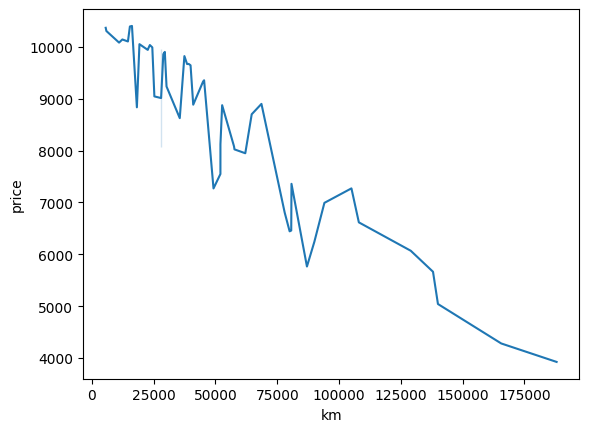

In [85]:
import seaborn as sns
import matplotlib as plt
result=pd.DataFrame(columns=['km','price'])
result['km']=X_test_1['km']
result['price']=ans1
sns.lineplot(x='km',y='price',data=result.head(50))

In [95]:
X_train_2,X_test_2,Y_train_2,Y_test_2=train_test_split(x1,y1,test_size=0.15)
finalans= LinearRegression()
finalans.fit(X_train_2,Y_train_2)
ans2=finalans.predict(X_test_2)
ans2

array([ 7349.75076293,  7198.14230074,  9728.63632287,  9755.84198411,
        6725.85341433,  6992.52152571,  7442.24820416, 10411.57297237,
        8196.44784098,  8061.99326733, 10314.01758734,  9798.0827116 ,
        5252.160333  , 10367.46475215,  6481.52582901,  8221.93710978,
        9936.68639787,  8326.12371458,  9674.83804357,  9873.39227902,
        7589.66543639, 10449.2981983 ,  6810.77462146,  9371.24159712,
        6770.64661819,  7113.59285762,  9867.89298713,  9745.65929006,
       10382.42921121,  7416.59342708, 10229.42839176, 10330.00032173,
        9703.08703667,  6987.72025906, 10110.31708316,  9778.39263389,
        7589.66543639,  7448.53489868,  9982.83578367,  7808.17006912,
        7930.11773438, 10395.79656722,  9630.06463057,  9337.4979033 ,
        7039.92505026, 10018.28938072, 10047.21933413,  9923.33539132,
        8494.68179296,  4300.41781511,  7246.6600385 ,  8332.2926469 ,
       10172.19418815, 10250.47233654,  9857.00974417,  7994.3615235 ,
      

<Axes: xlabel='km', ylabel='price'>

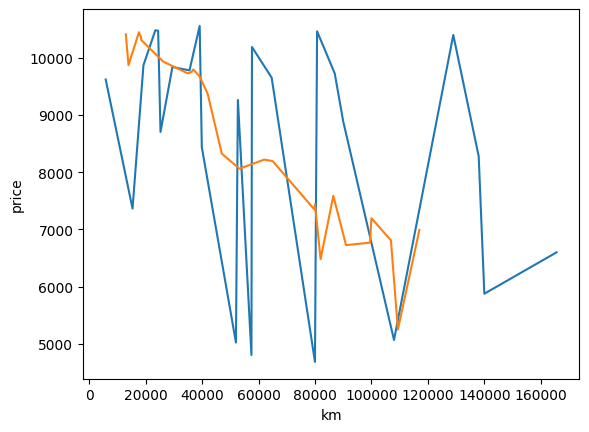

In [100]:
result1=pd.DataFrame(columns=['km','price'])
result2=pd.DataFrame(columns=['km','price'])
result1['km']=X_test_1['km']
result1['price']=ans1
result2['km']=X_test_2['km']
result2['price']=ans2
sns.lineplot(x='km',y='price',data=result1.head(25))
sns.lineplot(x='km',y='price',data=result2.head(25))